In [1]:
using Plots
using Distributions
using Random, DataFrames
using LinearAlgebra
using MLJ, MLJLinearModels
using Hyperopt
include("src/qsrfe.jl")
using .qsrfe

In [2]:
bX, bY = @load_boston
df = DataFrame(bX)
bX = Matrix(DataFrame(bX))
bY = collect(bY)
bX

bX = (bX .- mean(bX)) ./ std(bX)
Y = (bY .- mean(bY)) ./ std(bY)
(xtrain, xtest), (ytrain, ytest) = partition((bX, bY), 0.9, rng=123, multi=true);

In [3]:
describe(ytrain)

Summary Stats:
Length:         405
Missing Count:  0
Mean:           22.335309
Minimum:        5.000000
1st Quartile:   16.600000
Median:         20.800000
3rd Quartile:   25.000000
Maximum:        50.000000
Type:           Float64


In [27]:
model = qsrfe.srfeRegressor(N=1000,λ=0.003)
c, ω, ζ = qsrfe.fit(model,xtrain,ytrain;verbose=true)
ypred = qsrfe.predict(model,xtest,c, ω, ζ)
ytrainpred = qsrfe.predict(model,xtrain,c, ω, ζ)
qsrfe.test_metrics(ytest,ypred,ytrain,ytrainpred)

support: 414/1000MSE: 12.347923781461654 train MSE: 8.928834001683542
rel: 0.13049955453459455 train rel: 0.10463860592938626


In [18]:
model = qsrfe.srfeRegressor(N=16384,λ=0.003,)
#quantizer = qsrfe.MSQ(K=2)
#quantizer = qsrfe.ΣΔQ(K=2,r=1,λ=2,condense=false)
quantizer = qsrfe.βQ(K=4,β=4.5,λ=16,condense=true)
c, ω, ζ = qsrfe.fit(model,xtrain,ytrain,quantizer;verbose=true)
ypred = qsrfe.predict(model,xtest,c, ω, ζ, quantizer)
ytrainpred = qsrfe.predict(model,xtrain,c, ω, ζ,quantizer)
qsrfe.test_metrics(ytest,ypred,ytrain,ytrainpred)

support: 28/1024

MSE: 19.513905981273336 train MSE: 34.69487853568111
rel: 0.16508959531350384 train rel: 0.17966240014839982


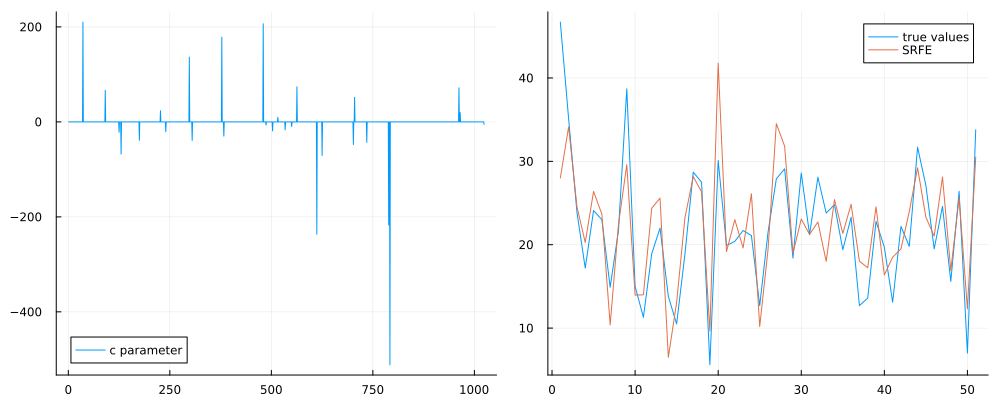

In [17]:
p1 = plot(c,label="c parameter")
p2 = plot(ytest, label="true values")
plot!(ypred, label="SRFE")
plot(p1,p2,layout=2,size=(1000,400))
